In [2]:
import os
import sys
import json
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from dotenv import load_dotenv 

load_dotenv()
sys.path.append(os.getenv("PROJECT_PATH"))

In [45]:

def create_metrics(json_file_path):
    """
    Create metrics 
    """
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    guessed_correct_values = []
    llm_similarity_values = []
    percentage_of_changed_word_values = []

    for obfuscator in data:
        for case in obfuscator[1]:
            prompt_metric = case.get('prompt_metric', {})
            answer_metric = case.get('answer_metric', {})
            
            guessed_correct = prompt_metric.get('guessed_correct')
            llm_similarity = answer_metric.get('llm_similarity')
            percentage_of_changed_word = prompt_metric.get('precentage_of_changed_word')

            if guessed_correct is not None and llm_similarity is not None and percentage_of_changed_word is not None:
                guessed_correct_values.append(guessed_correct)
                llm_similarity_values.append(llm_similarity)
                percentage_of_changed_word_values.append(percentage_of_changed_word)
    metrices = [
        ("percentage_of_changed_word", percentage_of_changed_word_values),
        ("guessed_correct", guessed_correct_values),
        ("answer llm_similarity", llm_similarity_values)
    ]
    return metrices
    

In [46]:
def make_individual_comparision(metrices):
    """
    Make individual comparision
    """
    for i in range(3):
        for j in range(i+1,3):
            # Plot the data
            plt.figure(figsize=(10, 6))
            plt.scatter(metrices[i][1], metrices[j][1], c='blue', label='Data Points')
            plt.xlabel(f'{metrices[i][0]}')
            plt.ylabel(f'{metrices[j][0]}')
            plt.title(f'Comparison of {metrices[i][0]} and {metrices[j][0]}')
            plt.legend()
            plt.grid(True)
            df = pd.DataFrame({metrices[i][0]: metrices[i][1], metrices[j][0]: metrices[j][1]})
            print(df[metrices[i][0]].corr(df[metrices[j][0]]))
            # print(np.corrcoef(metrices[i][1], metrices[j][1]))
            plt.show()

In [47]:
def save_individual_comparision(metrices, path):
    """
    Save individual comparision
    """
    for i in range(3):
        for j in range(i+1,3):
            # Plot the data
            plt.figure(figsize=(10, 6))
            plt.scatter(metrices[i][1], metrices[j][1], c='blue', label='Data Points')
            plt.xlabel(f'{metrices[i][0]}')
            plt.ylabel(f'{metrices[j][0]}')
            plt.title(f'Comparison of {metrices[i][0]} and {metrices[j][0]}')
            plt.legend()
            plt.grid(True)
            df = pd.DataFrame({metrices[i][0]: metrices[i][1], metrices[j][0]: metrices[j][1]})
            print(df[metrices[i][0]].corr(df[metrices[j][0]]))
            # print(np.corrcoef(metrices[i][1], metrices[j][1]))
            plt.savefig(os.path.join(path,f"{metrices[i][0]}_{metrices[j][0]}.png"))

In [48]:
def generate_3d_plot(metrices):
    x_data = [metrices[0][1][i] for i in range(len(metrices[0][1]))]
    y_data = [metrices[1][1][i] for i in range(len(metrices[0][1]))]
    z_data = [metrices[2][1][i] for i in range(len(metrices[0][1]))]


    # Create the 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=x_data,
        y=y_data,
        z=z_data,
        mode='markers',
        marker=dict(
            size=5,
            color=z_data,  # set color to an array/list of desired values
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        )
    )])

    # Update layout
    fig.update_layout(
        title='3D Scatter Plot of Metrices',
        scene=dict(
            xaxis_title=f'{metrices[0][0]}',
            yaxis_title=f'{metrices[1][0]}',
            zaxis_title=f'{metrices[2][0]}'
        )
    )
    return fig    

In [49]:
def save_3d_graph(metrices,path):
    fig = generate_3d_plot(metrices)
    fig.write_html(path)
    # Show the plot
    print(f"3D plot saved as {path}")

In [50]:
def show_3d_graph(metrices):
    fig = generate_3d_plot(metrices)
    fig.show()

In [51]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

def save_3d_approx_graph(metrices, path):
    x = [metrices[0][1][i] for i in range(len(metrices[0][1]))]
    y = [metrices[1][1][i] for i in range(len(metrices[0][1]))]
    z = [metrices[2][1][i] for i in range(len(metrices[0][1]))]
    scatter = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.8
        )
    )

    scatter_layout = go.Layout(
        title="3D Scatter Plot",
        scene=dict(
            xaxis_title='percentage_of_changed_word_values',
            yaxis_title='guessed_correct',
            zaxis_title='answer llm_similarity'
        )
    )

    scatter_fig = go.Figure(data=[scatter], layout=scatter_layout)
    scatter_fig.show()
    # Convert to a continuous surface using interpolation
    # Create grid values for x and y
    grid_x, grid_y = np.mgrid[0:1:70j, 0:1:70j]

    # Interpolate z values on the grid
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

    # Create Continuous Surface Plot
    surface = go.Surface(
        z=grid_z,
        x=grid_x,
        y=grid_y,
        colorscale='Viridis'
    )

    surface_layout = go.Layout(
        title="Continuous 3D Surface",
        scene=dict(
            xaxis_title='percentage_of_changed_word_values',
            yaxis_title='guessed_correct',
            zaxis_title='answer llm_similarity'
        )
    )

    surface_fig = go.Figure(data=[surface], layout=surface_layout)
    surface_fig.write_html(path)
    surface_fig.show()

In [76]:
json_file_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", "2024-09-12", "software development - big test.json")
metrices = create_metrics(json_file_path)

-0.4736045635424993


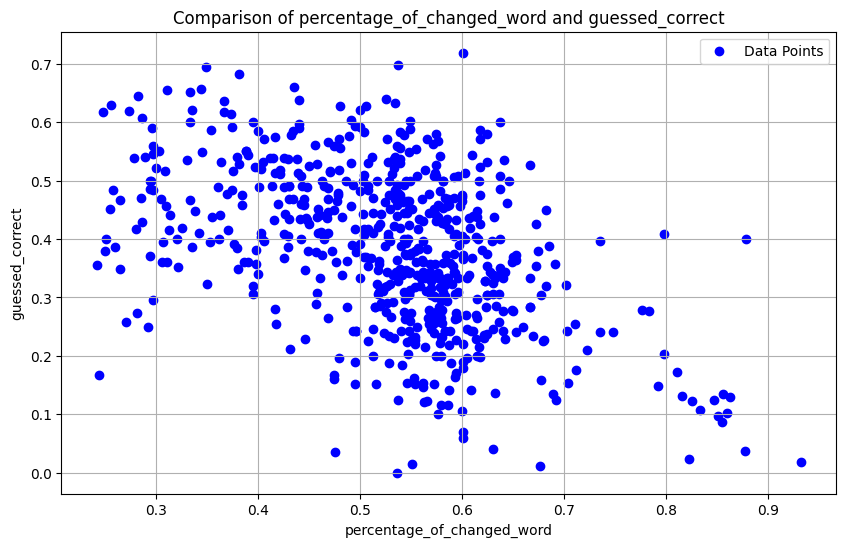

-0.2702481454168247


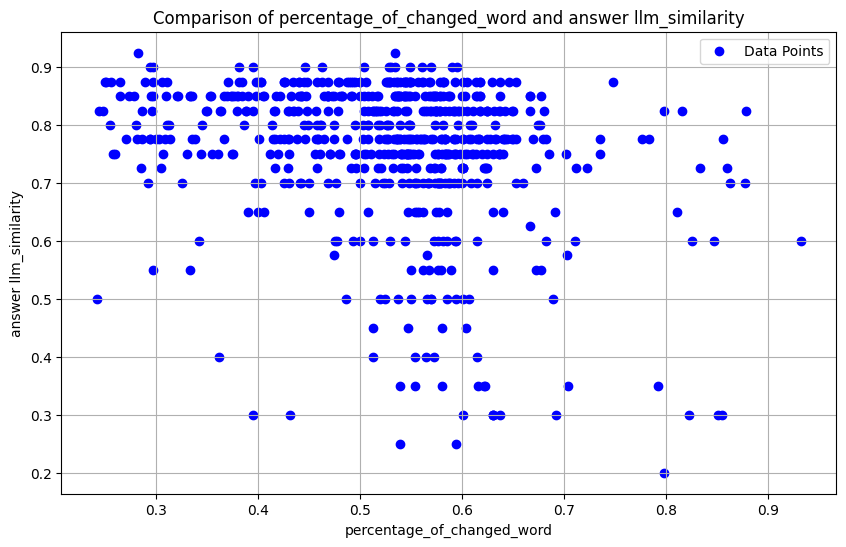

0.377643901795088


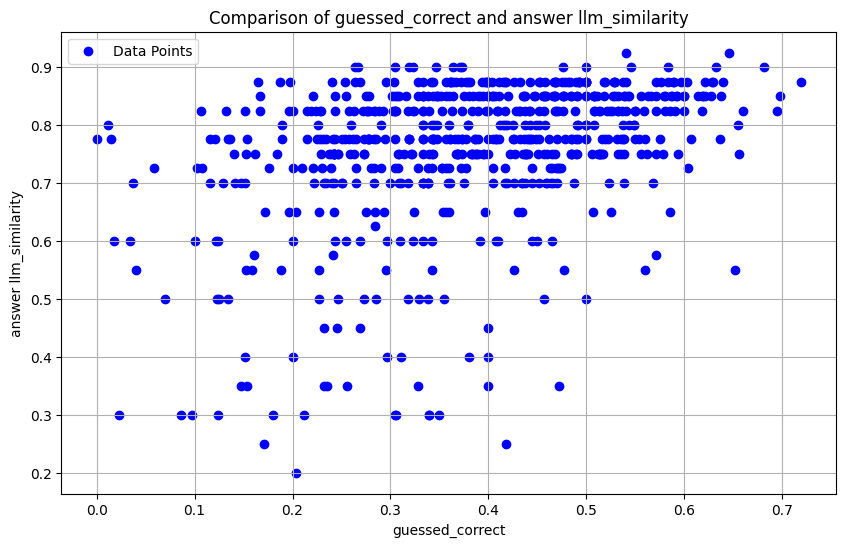

In [77]:
make_individual_comparision(metrices)

In [31]:
path = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", os.getenv("DATE"), "Presentation", "software development 3D.html")
save_3d_graph(metrices, path)

3D plot saved as c:\Users\orendi\Documents\EmojiCrypt-main\Emojicrypt\data\September-2024\2024-09-10\Presentation\software development 3D.html


In [32]:
path = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", os.getenv("DATE"), "Presentation")
out_put = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", os.getenv("DATE"), "Presentation", "movie data set results.html")
save_3d_approx_graph(metrices, out_put)
# save_3d_graph(metrices,path)

In [13]:
show_3d_graph(metrices)

In [14]:
json_file_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", "2024-09-08", "Presentation", "combined data copy.json")
output = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", "2024-09-08", "Presentation", "Movie_continuous_3d_surface - lower interpolation.html")
metrices = create_metrics(json_file_path)
save_3d_approx_graph(metrices, output)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\orendi\\Documents\\EmojiCrypt-main\\Emojicrypt\\data\\September-2024\\2024-09-08\\Presentation\\combined data copy.json'

In [24]:
import json
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

for obfuscator in data:
    for case in obfuscator[1]:
        if case["answer_metric"]["llm_similarity"] >=0.85:
            print(case)

{'original_prompt': 'Mergers and acquisitions (M&A) play a pivotal role in business growth and financial restructuring by enabling companies to expand their market presence, diversify their product lines, and achieve economies of scale. Through M&A, businesses can acquire new technologies, enter new markets, and enhance their competitive edge. Financial restructuring often accompanies these transactions, allowing companies to optimize their capital structure, reduce costs, and improve overall financial health. Additionally, M&A activities can lead to synergies that result in increased efficiency and profitability. However, successful integration is crucial to realizing these benefits, as poorly managed mergers or acquisitions can lead to cultural clashes, operational disruptions, and financial losses.\n\n**Question:** How do mergers and acquisitions contribute to business growth and financial restructuring, and what are some potential challenges associated with these activities?', 'obf

0.3333333333333333
0.45714285714285713
0.12359550561797752
0.2403846153846154
0.3424657534246575
0.2948717948717949
0.13445378151260504
0.11594202898550725
0.12871287128712872
0.25
0.2375
0.4246575342465753
0.4266666666666667
0.24050632911392406
0.5263157894736842
0.27848101265822783
0.4
0.018018018018018018
0.43243243243243246
0.2625
0.16176470588235295
0.1511627906976744
0.14772727272727273
0.10204081632653061
0.21518987341772153
0.32432432432432434
0.20388349514563106
0.33783783783783783
0.24175824175824176
0.527027027027027
0.037037037037037035
0.12345679012345678
0.28378378378378377
0.5076923076923077
0.4375
0.12222222222222222
0.2767857142857143
0.34210526315789475
0.38181818181818183
0.2318840579710145
0.17647058823529413
0.15384615384615385
0.3787878787878788
0.20930232558139536
0.011764705882352941
0.1717171717171717
0.3283582089552239
0.2692307692307692
0.08602150537634409
0.22784810126582278
0.46551724137931033
0.058823529411764705
0.13186813186813187
0.453125
0.376623376623

ValueError: x and y must be the same size

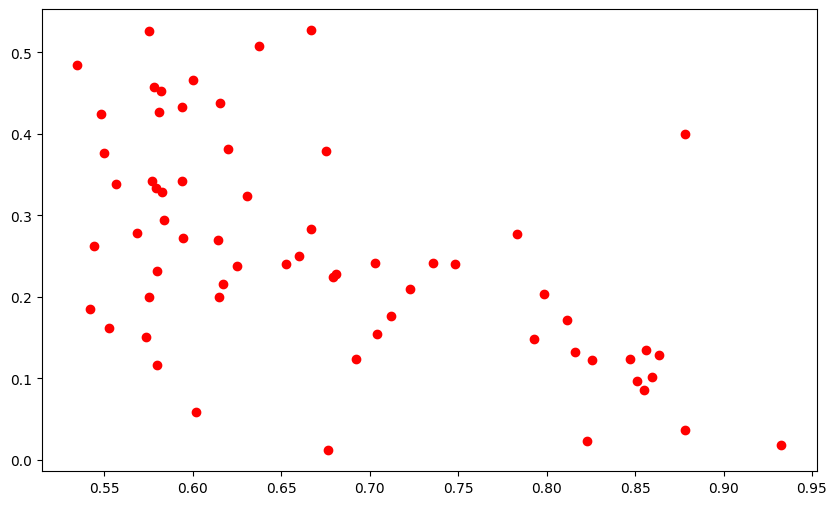

In [20]:
import json
import matplotlib.pyplot as plt
import os
import sys
from dotenv import load_dotenv 
load_dotenv()
json_file_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "September-2024", "2024-09-15", "software development - big test.json")
# Load the JSON data
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Define a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Iterate over the lists in the JSON data
for i, value in enumerate(data):
    # Extract x and y coordinates
    try:
        x = [point["prompt_metric"]["precentage_of_changed_word"] for point in value[1]]
        
        y = [point["prompt_metric"]["guessed_correct"] for point in value[1]]
    except:
        print("here")
        print(value)
    # Plot the points with a specific color
    plt.scatter(x, y, color=colors[i % len(colors)], label=value[0])

# Add labels and title
plt.xlabel('precentage_of_changed_word')
plt.ylabel('guessed_correct')
plt.title('Scatter Plot with Different Colors for Each List')
plt.legend()

# Show the plot
plt.savefig("software development big test.jpg")